 <div align=center>
    <font color=green size=6>
    <br />
Practical Assignment 
    <br/>
    </font>
    </div>

In [57]:
#necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns   
import math
from sklearn.tree import DecisionTreeClassifier

 <div align=center>
    <font color=gray size=5>
    <br />
Part 1
    <br/>
    </font>
    </div>

In [58]:
#load data
dataset = pd.read_csv("data.csv",index_col=0)
dataset.head()

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

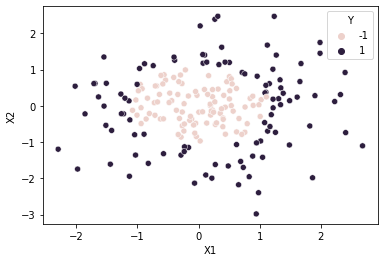

In [59]:
#plot given dataset colored by their labels
sns.scatterplot(x = dataset['X1'], y = dataset['X2'], hue = dataset['Y'])

In [60]:
#split the dataset into train set (80% of the data) and test set (20% of the data).
mask = np.random.rand(len(dataset)) <= 0.8
training = dataset[mask]
testing = dataset[~mask]
print("count of training dataset's rows",len(training))
print("count of testing dataset's rows",len(testing))

count of training dataset's rows 155
count of testing dataset's rows 45


 <div align=center>
    <font color=gray size=5>
    <br />
Part 2
    <br/>
    </font>
    </div>

In [61]:
m = len(training)

#initialize w
w = np.ones(m)
w = w / m

coefficient = []
weak_learner = []

#implement AdaBoost algorithm based on page 4's algorithm
#assume T= 50
for i in range(50):
    clf = DecisionTreeClassifier(max_depth=1, random_state=1)
    clf.fit(training.drop(columns=['Y']),training['Y'],w)
    h = clf.predict(training.drop(columns=['Y']))
    indicator = (h != training['Y'])
    epsilon = ((np.multiply(w ,indicator )).sum())/ w.sum()
    alpha = 0.5 * np.log((1- epsilon)/epsilon)
    normalization_factor = 2 * math.sqrt((1- epsilon) * epsilon) 
    w = np.multiply(w, np.exp(-alpha * np.multiply(h ,training['Y']))) / normalization_factor
    coefficient.append(alpha)
    weak_learner.append(clf)    

 <div align=center>
    <font color=gray size=5>
    <br />
Part 3
    <br/>
    </font>
    </div>

In [62]:
#using part2 function to classify testing datas
count = len(weak_learner)
result = np.zeros(len(testing))

for i in range(count):
    h = weak_learner[i].predict(testing.drop(columns=['Y']))
    h = coefficient[i] * h
    result = result + h

final_result = np.sign(result)

#accuracy -> (all datas - missclasification datas/ all datas)
indicator = (final_result != testing['Y'])
accuracy = (len(testing) - indicator.sum())/len(testing)
print("accuracy: " ,accuracy)

#Error_function 
E = np.exp(-np.multiply(testing['Y'],final_result)).sum()
print("Error: ",E)

accuracy:  0.9777777777777777
Error:  18.904977240002513


<AxesSubplot:xlabel='X1', ylabel='X2'>

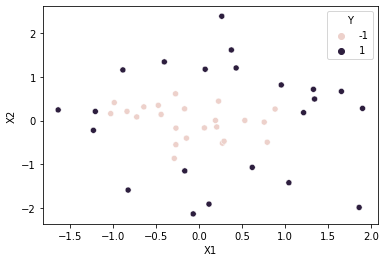

In [63]:
#plot testing datas colored by their actual labels
sns.scatterplot(x = testing['X1'], y = testing['X2'], hue = testing['Y'])

<AxesSubplot:xlabel='X1', ylabel='X2'>

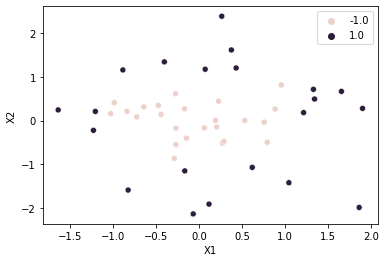

In [64]:
#plot testing datas colored by their obtained labels
sns.scatterplot(x = testing['X1'], y = testing['X2'], hue = final_result)

 <div align=center>
    <font color=green size=4>
    <br />
Thanks !
    <br/>
    </font>
    </div>